# Python для анализа данных

использован блокнот: *Алла Тамбовцева, НИУ ВШЭ*

дополнения +++ : *Ян Пиле, НИУ ВШЭ*


### Автоматизация работы в браузере: библиотека `selenium`

Библиотека `selenium` – набор инструментов для интерактивной работы в браузере средствами Python. Вообще Selenium ‒ это целый проект, в котором есть разные инструменты. Мы рассмотрим один из самых распространенных ‒ Selenium WebDriver, модуль, который позволяется Python встраиваться в браузер и работать в нем как пользователь: кликать на ссылки и кнопки, заполнять формы, выбирать опции в меню и прочее. 

Мы будем использовать WebDriver для решения такой задачи: Необходимо выгрузить все адреса участковых избирательных  комиссий Ивановской области. 

Сначала загрузим веб-драйвер из библиотеки `selenium`. 

In [5]:
!pip install selenium

In [19]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select

# browser = webdriver.Firefox()

Если Python пишет `No module called selenium`, убедитесь, что у вас установлена эта библиотека. Самый надежный способ установить ее ‒ найти *Anaconda Command Prompt*, вписать строку `pip install selenium` и нажать *Enter*. Если *Anaconda Command Prompt* не находится, можно поступить так: запустить Jupyter Notebook, щелкнуть на черное окно консоли, нажать *Ctrl+Z* (остановить запуск Jupyter), а потом так же ввести в этом окне строку `pip install selenium` и нажать *Enter*.

Затем нужно выбрать браузер и открыть новое окно через Python. Для этого нужно вызвать функцию, которая отвечает за открытие браузера. Обычно используется Chrome. Но я разом покажу пример и для Firefox

Так случилось, что мне использовать Chrome нельзя, поэтому я все буду показывать на примере Firefox. 

In [3]:
# safaridriver --enable

In [20]:
from selenium import webdriver

driver = webdriver.Firefox()

Если код выше не исполняется, скачайте файл с веб-драйвером [отсюда](https://sites.google.com/a/chromium.org/chromedriver/downloads), распакуйте архив и пропишите путь к файлу в круглых скобках (в примере файл с расширением exe на Windows). Чтобы прописать путь на Mac'е или Linux'e, нужно выполнить такую команду в терминале:
    
    export PATH="$PATH:/Путь/до/драйвера"

У меня было так: 
    
    export PATH="$PATH:/Users/i.pile/Documents/chromedriver"


In [ ]:
# br = wb.Chrome('C:/Users/student/Desktop/chromewebdriver/chromedriver.exe')

In [2]:
# br = wb.Chrome("/Users/allat/Downloads/chromedriver")

In [23]:
import requests
from bs4 import BeautifulSoup
s = requests.get("http://cikrf.ru/digital-services/naydi-svoy-izbiratelnyy-uchastok/").text

In [24]:
BeautifulSoup(s)

<!DOCTYPE html>
<html>
<head>
<title>Информирование об избирательных комиссиях и комиссиях референдума</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/bitrix/js/main/core/css/core.css?14822420448964" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/select2/select2.min.css?158973927217429" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/bootstrap/css/bootstrap.min.css?1589739273121200" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/viewbox/viewbox.css?15897392722692" rel="stylesheet" type="text/css"/>
<link href="/assets/css/cikrf/style.css?159793115549385" rel="stylesheet" type="text/css"/>
<link href="/digital-services/assets/css/style.css?160705145414136" rel="stylesheet" type="text/css"/>
<script type="text/javascript">if(!window.BX)window.BX={message:function(mess){if(typeof mess=='object') for(var i in

In [28]:
driver.get("http://cikrf.ru/digital-services/naydi-svoy-izbiratelnyy-uchastok/")

Раньше эта ссылка работала иначе! За время этих лекций сайт успел несколько раз измениться, так что нам придется переконфигурировать нашу работу :)
У нас открывается страница, которая мешает просмотру (там что-то написано о персональных данных пользователей). Ее надо закрыть. Чтобы закрыть ее, нужно ткнуть в какой-то кликабельный элемент, прямо как если бы вы физически открывали эту страницу. Чтобы найти кликабельный элемент, нужно зайти в код страницы, навести на интересующий вас элемент и,например, скопировать его XPath. Что за  XPath, спросите вы. Это путь, по которому можно найти элемент в Xml- или html-размеченном документе. Скажем, в документе вида:

    <tag1>
        <tag2>
            <tag3>
            </tag3>
        </tag2>
    </tag1>

Путь до tag3 будет иметь вид:

    /tag1/tag2/tag3

In [26]:
'/html/body/div[2]/div/div/button'

'/html/body/div[2]/div/div/button'

In [29]:
fld = driver.find_element_by_xpath('/html/body/div[2]/div/div/button')
fld.click()

Ура, страница открылась. Мы хоти искать по региону и номеру учатка, стало быть нужно два поля. Сохраним номер участка в переменную `n_uik`, а регион ‒ в `reg`.

In [34]:
n_uik = 244
reg = "Ивановская область"

Вопрос: как эти два поля заполнить? Нужно найти их на странице, открытой в браузере, и вписать туда нужные строки. Только сделать это нужно через Python. 

![](selenium1.png)

Надо найти этот элемент, как в прошлый раз:
Код элемента -> Скопировать XPath

![](selenium2.png)

Теперь туда надо нажать

In [ ]:
'/html/body/div[1]/div/div[2]/div/div[4]/form/div[1]/div[2]'
/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[1]/div/span/span[1]/span/span[2]

In [30]:
fld = driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div[4]/form/div[1]/div[2]")
fld.click()

Мы, наконец, попали на отображение функциональности с выбором поля УИК и Региона. Чтоб ввести регион, нужно в соответствующее место кликнуть. Мы такое уже делали:

In [115]:
'/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[1]/div/span/span[1]/span/span[2]'
/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[1]/div/span/span[1]/span/span[2]

'/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[1]/div/span/span[1]/span/span[2]'

In [31]:
fld = driver.find_element_by_xpath('/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[1]/div/span/span[1]/span/span[2]')
fld.click()

В реальной жизни мы бы после нажали ENTER. Здесь тоже так можно (последняя команда)

In [32]:
'/html/body/span/span/span[1]/input'

'/html/body/span/span/span[1]/input'

In [33]:
# вводим название региона в поле - метод send_keys
reg_field = driver.find_element_by_xpath('/html/body/span/span/span[1]/input')
reg_field.send_keys(reg)


NameError: name 'reg' is not defined

In [22]:
reg_field.send_keys(Keys.RETURN)

Теперь нужно выбрать номер участка. Для этого осталось ввести в поле нужный нам номер (пока что у нас 244)

![](selenium3.png)

Все, заталкиваем в это поле наш УИК и пытаемся искать :)

In [120]:
'/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[2]/div/input'

'/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[2]/div/input'

In [23]:
# вводим номер УИКа в поле - метод send_keys
uik_field = driver.find_element_by_xpath('/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[2]/div/input')
uik_field.click()
uik_field.send_keys(n_uik)


In [24]:
uik_field.send_keys(Keys.RETURN)

В браузере открылась страница с адресом избирательного участка. 

![](selenium4.png)

Осталось подгрузить `re` и найти на странице адрес участка с помощью,например, регулярных выражений.

In [25]:
driver = webdriver.Chrome()

In [26]:
from time import sleep

driver.get("http://www.cikrf.ru/services/lk_address/?do=find_by_uik")

fld = driver.find_element_by_xpath("/html/body/div[2]/div/div/button")
fld.click()

sleep(1.5)

fld = driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div[4]/form/div[1]/div[2]")
fld.click()

sleep(1.5)

fld = driver.find_element_by_xpath('/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[1]/div/span/span[1]/span/span[2]')
fld.click()

sleep(1.5)

reg_field = driver.find_element_by_xpath('/html/body/span/span/span[1]/input')
reg_field.send_keys(reg)

sleep(1.5)

reg_field.send_keys(Keys.RETURN)

sleep(1.5)

uik_field = driver.find_element_by_xpath('/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[2]/div/input')
uik_field.click()
uik_field.send_keys(n_uik)

sleep(1.5)

uik_field.send_keys(Keys.RETURN)

Осталось выгрузить адрес для голосования. 

In [27]:
from bs4 import BeautifulSoup

In [28]:
my_page = BeautifulSoup(driver.page_source)

<html class="bx-mac bx-no-touch bx-retina bx-chrome bx-boxshadow bx-borderradius bx-flexwrap bx-boxdirection bx-transition bx-transform"><head><script charset="utf-8" src="https://vec01.maps.yandex.net/tiles?l=mapj&amp;v=20.11.20-0&amp;x=40430&amp;y=19976&amp;z=16&amp;scale=1&amp;lang=ru_RU&amp;callback=x_40430_y_19976_z_16_l_mapj"></script>
<title>Информирование об избирательных комиссиях и комиссиях референдума</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/bitrix/js/main/core/css/core.css?14821812008964" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/select2/select2.min.css?158973927217429" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/bootstrap/css/bootstrap.min.css?1589739273121200" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/viewbox/viewbox.css?15897392722692" rel="stylesheet" type="text/css"/
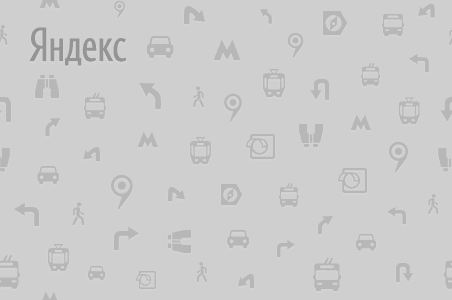
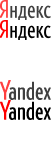
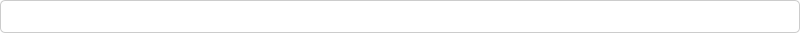
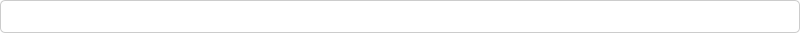
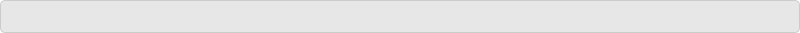
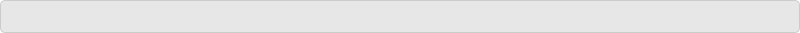
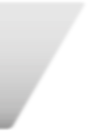
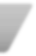
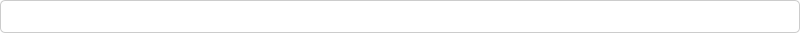
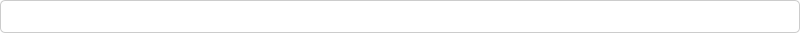
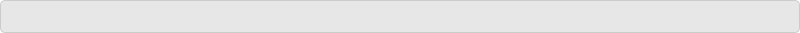
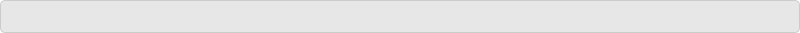
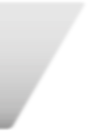
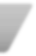
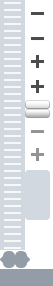
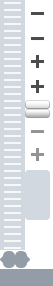
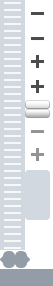
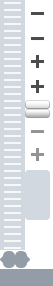
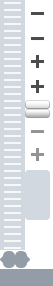

In [29]:
my_page

In [30]:
[i.text for i in my_page.find_all('span',{'class':'address'})]

['',
 '',
 '155800, Ивановская область, город Кинешма, улица Григория Королева, дом 10, здание "Кинешемский политехнический колледж"',
 '155800, Ивановская область, город Кинешма, улица Григория Королева, дом 10, здание "Кинешемский политехнический колледж"']

In [31]:
p = filter(lambda x: x not in ('',None),[i.text for i in my_page.find_all('span',{'class':'address'})])

In [32]:
p = next(p)

Получилось! Единственное, хорошо бы учесть случаи, когда адреса участка в таком виде на странице нет (такие случаи бывают: иногда страница создана не по шаблону, иногда указан адрес территориальной комиссии). Для этого нам понадобится условие. Добавим «развилку»: пусть Python пробует найти адрес через указанное регулярное выражение, а если не найдет, то ищет его с помощью другого регулярного выражения. 

In [133]:
if p is None or p=='':
    p = 'Адреса не нашлось'
p

'155800, Ивановская область, город Кинешма, улица Григория Королева, дом 10, здание "Кинешемский политехнический колледж"'

Теперь у нас есть +- универсальный код, который позволяет найти адрес избирательного участка по номеру. В следующий раз мы оформим этот код в функцию, чтобы можно было подставлять в нее любой номер и регион, и применять ее в цикле, итерируя по номерам участков.